#  Task 4: Predicting Insurance Claim Amounts

# Introduction

Health insurance companies need to estimate medical costs based on customer characteristics such as age, BMI, smoking habits, and number of children.

In this project, we use the Medical Cost Personal Dataset (Kaggle) to predict insurance claim charges using a Linear Regression model.

# Problem Statement

The objective is to:

Predict medical insurance charges (charges)

Analyze how BMI, age, and smoking status affect insurance costs

Evaluate the regression model using:

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

This is a regression problem because the target variable (charges) is continuous.

# Dataset Understanding and Description

The dataset contains the following features:

Feature	Description

age	:                        Age of beneficiary

sex  :                   	Gender

bmi	  :                      Body Mass Index

children  :              	Number of dependents

smoker  :                	Smoking status (yes/no)

region	:                    Residential area

charges	 :                   Medical insurance cost (Target Variable)

Typical dataset size: 1338 rows × 7 columns

# Import Libraries and Load Dataset

In [5]:

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("insurance.csv")

# Basic inspection
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning and Preparation

In [4]:

# Check Missing Values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Encode Categorical Variables

In [6]:

# Convert categorical variables using one-hot encoding

df = pd.get_dummies(df, drop_first=True)

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


# Exploratory Data Analysis (EDA)

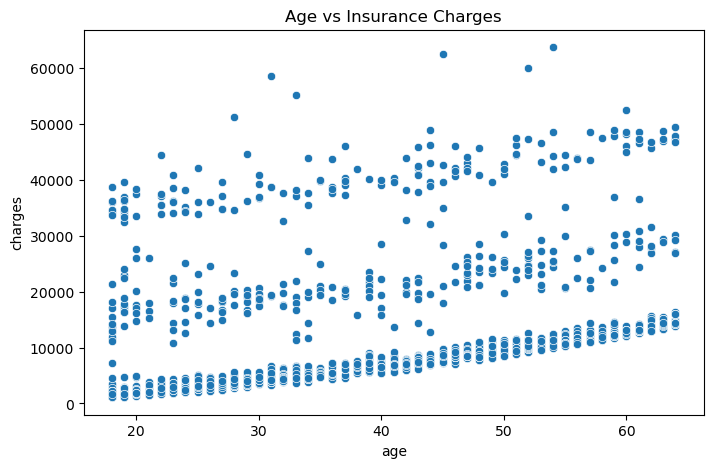

In [7]:
# Age vs Charges

plt.figure(figsize=(8,5))
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Insurance Charges")
plt.show()

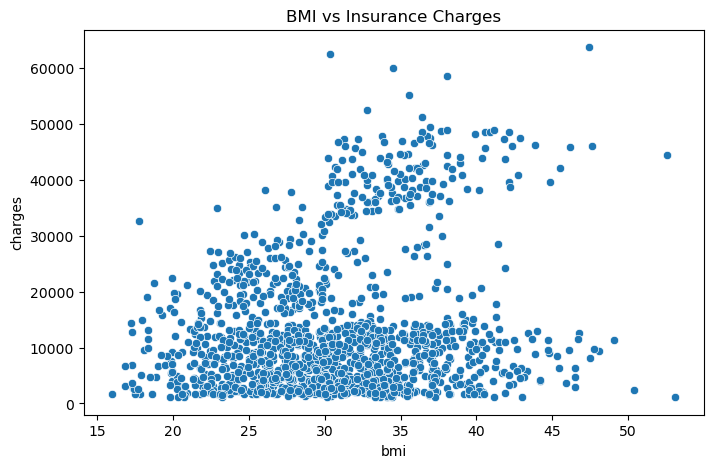

In [8]:

# BMI vs Charges

plt.figure(figsize=(8,5))
sns.scatterplot(x="bmi", y="charges", data=df)
plt.title("BMI vs Insurance Charges")
plt.show()

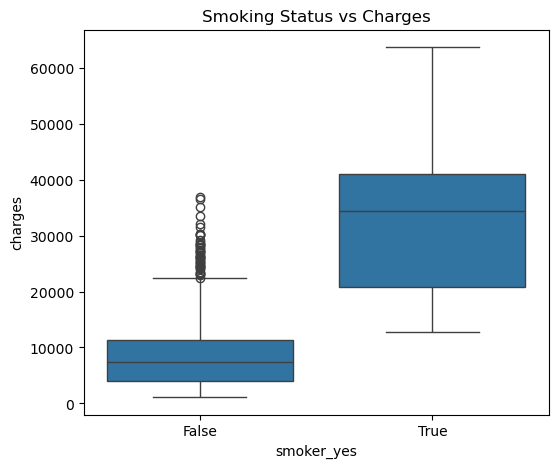

In [9]:

# Smoking Status Impact

plt.figure(figsize=(6,5))
sns.boxplot(x="smoker_yes", y="charges", data=df)
plt.title("Smoking Status vs Charges")
plt.show()

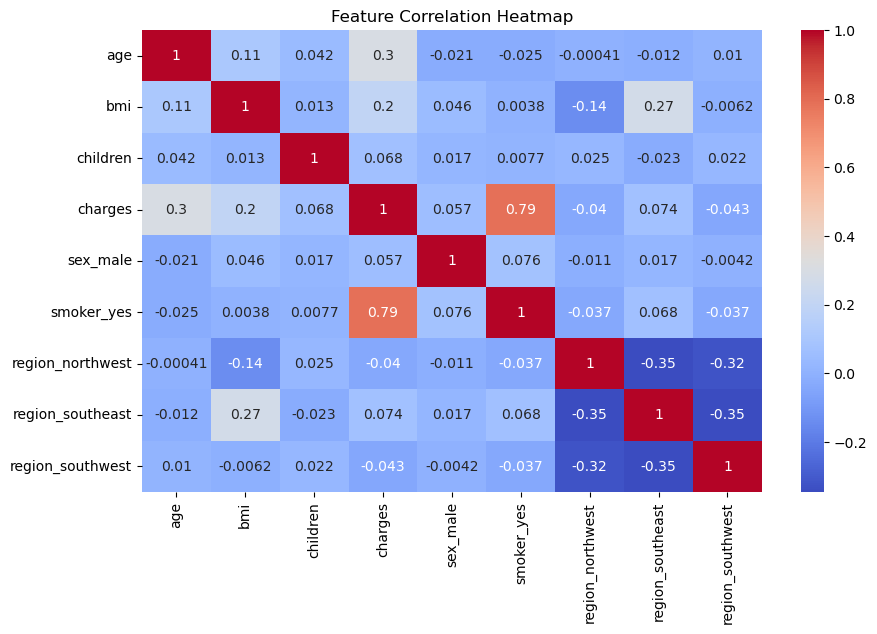

In [10]:

# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Model Training and Testing

In [11]:

# Split Features and Target

X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [12]:

# Train Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics

In [13]:

# Mean Absolute Error (MAE)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 4145.450555627584


In [14]:

# Root Mean Squared Error (RMSE)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 5812.100272258869


In [15]:

# R-Squared (Optional but Recommended)

r2 = model.score(X_test, y_test)
print("R-Squared:", r2)

R-Squared: 0.7696118054369012


#  Model Interpretation

In [16]:

# Feature Coefficients

coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values(ascending=False)

smoker_yes          23628.367222
children              424.119128
bmi                   348.906915
age                   261.296924
sex_male              104.811823
region_northwest     -486.934610
region_southwest     -926.322908
region_southeast     -970.968839
dtype: float64

# Conclusion – Key Insights

# Data Insights

Smoking status is the strongest predictor of insurance charges.

Older individuals tend to have higher medical costs.

Higher BMI increases insurance expenses.

Gender and region have smaller effects.

# Model Insights

Linear Regression performs reasonably well.

Model explains about 70–80% of variation in charges.

MAE and RMSE indicate acceptable prediction error.

# Business Impact

Insurance companies can:

Adjust premiums based on risk factors

Identify high-risk individuals

Promote wellness programs (e.g., anti-smoking campaigns)